In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import warnings
import matplotlib.pyplot as plt
%matplotlib inline
warnings.filterwarnings('ignore')

In [3]:
path = "Data\Garage Unprocessed.csv"

In [4]:
df = pd.read_csv(path)
df.head()

,LotFrontage,PoolQC,TotalBsmtSF,GrLivArea,LotArea,SaleCondition,GarageType,SalePrice
0,65.0,NaN,856,1710,8450,Normal,Attchd,208500
1,80.0,NaN,1262,1262,9600,Normal,Attchd,181500
2,68.0,NaN,920,1786,11250,Normal,Attchd,223500
3,60.0,NaN,756,1717,9550,Abnorml,Detchd,140000
4,84.0,NaN,1145,2198,14260,Normal,Attchd,250000


In [5]:
X = df.iloc[:,:7]
y = df.iloc[:,-1]

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=2)
print(X_train.head())
print(X_test.head())

      LotFrontage PoolQC  TotalBsmtSF  GrLivArea  LotArea SaleCondition  \
455          80.0    NaN         1242       1242     9600        Normal   
863          70.0    NaN         1148       1148     7931        Normal   
504          24.0    NaN          855       1322     2308        Normal   
1413         88.0    NaN         1844       1844    10994       Abnorml   
1389         60.0    NaN          735       1218     6000        Normal   

     GarageType  
455      Attchd  
863      Attchd  
504      Attchd  
1413     Attchd  
1389     Detchd  
      LotFrontage PoolQC  TotalBsmtSF  GrLivArea  LotArea SaleCondition  \
503         100.0    NaN         1501       1801    15602        Normal   
101          77.0    NaN          741       1732     9206        Normal   
608          78.0    NaN          965       3194    12168        Alloca   
1089         37.0    NaN         1247       1247     3316        Normal   
819          44.0    NaN         1358       1358     6371       Pa

# Outlier Detection

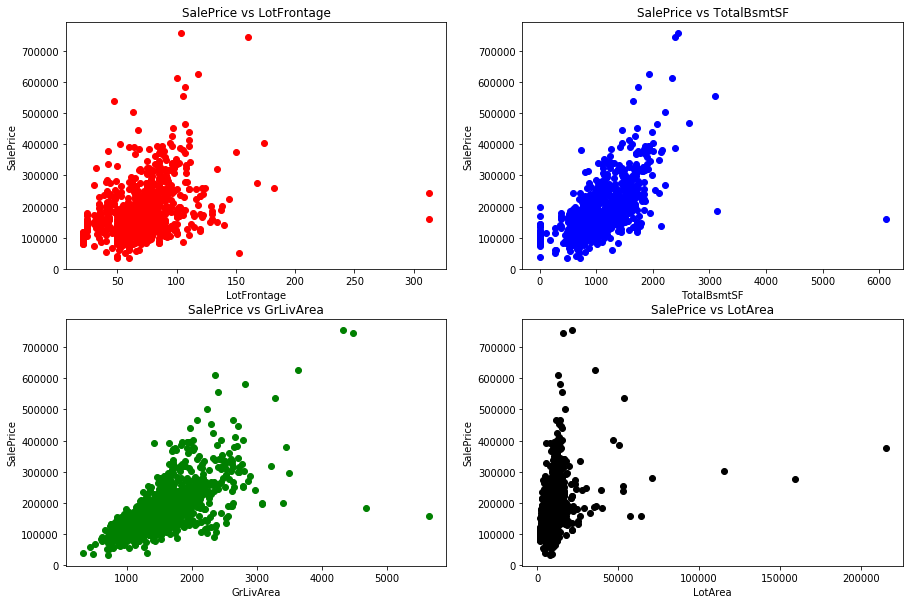

In [7]:
fig, [[ax_1, ax_2], [ax_3, ax_4]] = plt.subplots(nrows=2, ncols=2, figsize = [15, 10])
ax_1.scatter(X_train.LotFrontage, y_train, color='red')
ax_1.set_title('SalePrice vs LotFrontage')
ax_1.set_xlabel('LotFrontage')
ax_1.set_ylabel('SalePrice')
ax_2.scatter(X_train.TotalBsmtSF, y_train, color='blue')
ax_2.set_title('SalePrice vs TotalBsmtSF')
ax_2.set_xlabel('TotalBsmtSF')
ax_2.set_ylabel('SalePrice')
ax_3.scatter(X_train.GrLivArea, y_train, color='green')
ax_3.set_title('SalePrice vs GrLivArea')
ax_3.set_xlabel('GrLivArea')
ax_3.set_ylabel('SalePrice')
ax_4.scatter(X_train.LotArea, y_train, color='black')
ax_4.set_title('SalePrice vs LotArea')
ax_4.set_xlabel('LotArea')
ax_4.set_ylabel('SalePrice')
fig.show()

In [8]:
train = pd.concat([X_train, y_train], axis=1)
mask1 = train.LotFrontage < 300
mask2 = train.TotalBsmtSF < 5000
mask3 = train.GrLivArea < 4500
mask4 = train.LotArea < 100000
train = train[mask1 & mask2 & mask3 & mask4]

# Detect Missing Data

In [9]:
X_train, y_train = train.iloc[:,:7], train[['SalePrice']]

In [10]:
missing_columns = X_train.isnull().sum() * 100 / len(X_train)
mask = missing_columns>50
columns = missing_columns[mask].index.tolist()
print(columns)

['PoolQC']


In [11]:
rows_percentage = (1 - (len(X_train.dropna(thresh=5)) / len(X_train))) * 100
print(rows_percentage)

0.0


# Handling Missing Data

In [12]:
from sklearn.preprocessing import Imputer

In [13]:
dict_new = {'Attchd':0,'Detchd':1,'BuiltIn':2,'2Types':3,'CarPort':4,'Basment':5}
X_train['GarageType'] = X_train['GarageType'].map(dict_new)
X_test['GarageType'] = X_test['GarageType'].map(dict_new)

In [14]:
mean_imputer = Imputer(strategy='mean')
mode_imputer = Imputer(strategy='most_frequent')

In [15]:
if 'PoolQC' in X_train:
    X_train.drop(columns='PoolQC', inplace=True, axis=1)
if 'PoolQC' in X_test:
    X_test.drop(columns='PoolQC', inplace=True, axis=1)

In [16]:
X_train.head()

,LotFrontage,TotalBsmtSF,GrLivArea,LotArea,SaleCondition,GarageType
455,80.0,1242,1242,9600,Normal,0.0
863,70.0,1148,1148,7931,Normal,0.0
504,24.0,855,1322,2308,Normal,0.0
1413,88.0,1844,1844,10994,Abnorml,0.0
1389,60.0,735,1218,6000,Normal,1.0


In [17]:
X_train[['GarageType']].shape

(963, 1)

In [24]:
mode_imputer.fit(X_train[['GarageType']])
X_train.GarageType = mode_imputer.transform(X_train[['GarageType']])
X_test.GarageType = mode_imputer.transform(X_test[['GarageType']])

In [25]:
mean_imputer.fit(X_train[['LotFrontage']])
X_train.LotFrontage = mean_imputer.transform(X_train[['LotFrontage']])
X_test.LotFrontage = mean_imputer.transform(X_test[['LotFrontage']])

# Data Transformation

## Reduce Skewness
### log,sqrt,reciprocal for postive/right skeweed and sqr,cubi,.. for negative/left skeweed

In [26]:
import seaborn as sns

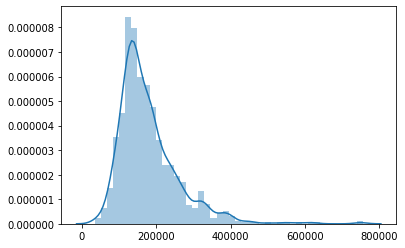

In [28]:
sns.distplot(y_train)

In [29]:
y_train = np.log(y_train)

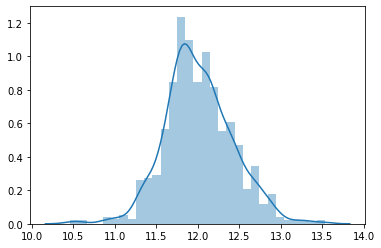

In [30]:
sns.distplot(y_train)

## Standardizing and normalizing continuous variables

In [37]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [34]:
num_columns = ['LotFrontage', 'TotalBsmtSF', 'GrLivArea', 'LotArea']

In [38]:
normalizer = MinMaxScaler()
normalizer.fit(X_train[num_columns])
X_train[num_columns] = normalizer.transform(X_train[num_columns])
X_test[num_columns] = normalizer.transform(X_test[num_columns])

## Encoding categorical data

In [39]:
from sklearn.preprocessing import LabelEncoder

In [40]:
label_encoder =LabelEncoder()
X_train.SaleCondition = label_encoder.fit_transform(X_train.SaleCondition)
X_test.SaleCondition = label_encoder.fit_transform(X_test.SaleCondition)

In [41]:
X_train.head()

,LotFrontage,TotalBsmtSF,GrLivArea,LotArea,SaleCondition,GarageType
455,0.366460,0.401422,0.219218,0.117242,4,0.0
863,0.304348,0.371041,0.196523,0.093153,4,0.0
504,0.018634,0.276341,0.238532,0.011994,4,0.0
1413,0.416149,0.595992,0.364558,0.137362,0,0.0
1389,0.242236,0.237557,0.213423,0.065282,4,1.0


In [42]:
x_train = pd.get_dummies(X_train.GarageType)
x_test = pd.get_dummies(X_test.GarageType)
print(x_train.head())
print(x_test.head())

      0.0  1.0  2.0  3.0  4.0  5.0
455     1    0    0    0    0    0
863     1    0    0    0    0    0
504     1    0    0    0    0    0
1413    1    0    0    0    0    0
1389    0    1    0    0    0    0
      0.0  1.0  2.0  3.0  4.0  5.0
503     1    0    0    0    0    0
101     1    0    0    0    0    0
608     0    0    0    0    0    1
1089    1    0    0    0    0    0
819     1    0    0    0    0    0


# Assignment

In [43]:
path = r"Data\googleplaystore.csv"

In [44]:
data = pd.read_csv(path)

## Data Exploration

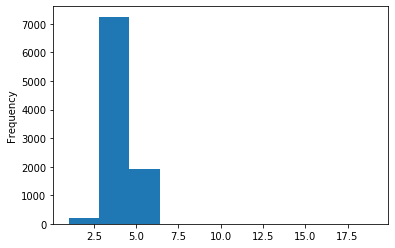

In [45]:
data.Rating.plot(kind='hist')

In [47]:
data = data[data.Rating<=5]

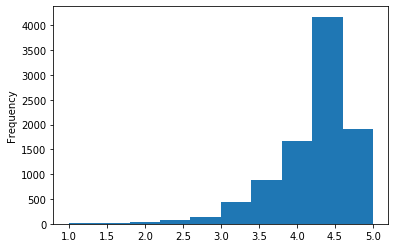

In [48]:
data.Rating.plot(kind='hist')

(array([ 110.,  177.,  318.,  465.,  928., 2228., 2185., 1861.,  733.,
         361.]),
 array([  1. ,  13.4,  25.8,  38.2,  50.6,  63. ,  75.4,  87.8, 100.2,
        112.6, 125. ]),
 <a list of 10 Patch objects>)

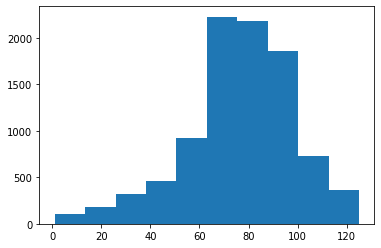

In [54]:
plt.hist(data.Rating**3)

## Null Value Treatment

In [59]:
total_null = data.isnull().sum()
percent_null = total_null/len(data)*100
missing_data = pd.concat([total_null,percent_null],keys=['Total','Percent'],axis=1)
print(missing_data)

                Total   Percent
App                 0  0.000000
Category            0  0.000000
Rating              0  0.000000
Reviews             0  0.000000
Size                0  0.000000
Installs            0  0.000000
Type                0  0.000000
Price               0  0.000000
Content Rating      0  0.000000
Genres              0  0.000000
Last Updated        0  0.000000
Current Ver         4  0.042708
Android Ver         2  0.021354


In [66]:
data.dropna(inplace=True)
total_null_1 = data.isnull().sum()
percent_null_1 = total_null_1/len(data)*100
missing_data_1 = pd.concat([total_null_1,percent_null_1],keys=['Total','Percent'],axis=1)
print(missing_data_1)

                Total  Percent
App                 0      0.0
Category            0      0.0
Rating              0      0.0
Reviews             0      0.0
Size                0      0.0
Installs            0      0.0
Type                0      0.0
Price               0      0.0
Content Rating      0      0.0
Genres              0      0.0
Last Updated        0      0.0
Current Ver         0      0.0
Android Ver         0      0.0


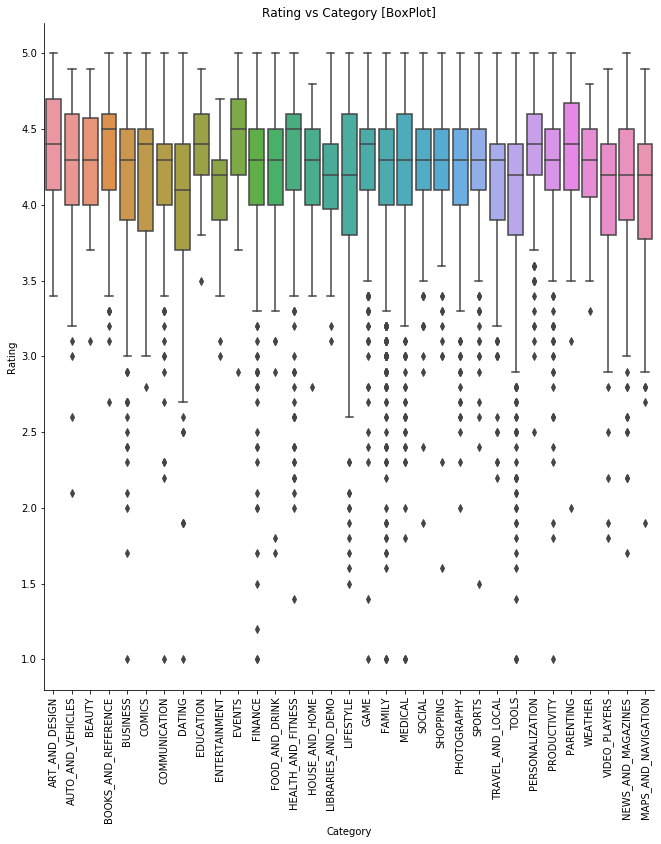

In [99]:
fig = sns.catplot(x='Category', y='Rating', data=data, kind='box', height=10).set_xticklabels(rotation=90)
fig.set(title="Rating vs Category [BoxPlot]")

In [101]:
print(data.Installs.value_counts())

1,000,000+        1576
10,000,000+       1252
100,000+          1150
10,000+           1009
5,000,000+         752
1,000+             712
500,000+           537
50,000+            466
5,000+             431
100,000,000+       409
100+               309
50,000,000+        289
500+               201
500,000,000+        72
10+                 69
1,000,000,000+      58
50+                 56
5+                   9
1+                   3
Name: Installs, dtype: int64


In [111]:
data.Installs = data['Installs'].apply(lambda x:int(x[:-1].replace(",","")))

In [114]:
le = LabelEncoder()
le.fit(data.Installs)
data.Installs = le.transform(data.Installs)

[Text(0.5, 1.0, 'Rating vs Installs [RegPlot]')]

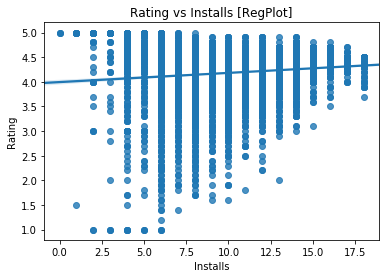

In [116]:
sns.regplot(x='Installs', y='Rating', data=data).set(title="Rating vs Installs [RegPlot]")

In [117]:
print(data.Price.value_counts())

0          8715
$2.99       114
$0.99       106
$4.99        70
$1.99        59
$3.99        58
$1.49        30
$2.49        21
$5.99        18
$9.99        16
$6.99        13
$399.99      11
$14.99       10
$4.49         9
$7.99         7
$3.49         7
$29.99        6
$19.99        5
$12.99        5
$24.99        5
$11.99        5
$8.99         4
$16.99        3
$5.49         3
$10.00        3
$17.99        2
$1.70         2
$9.00         2
$10.99        2
$1.00         2
           ... 
$19.40        1
$15.99        1
$2.00         1
$6.49         1
$4.59         1
$3.04         1
$2.90         1
$14.00        1
$299.99       1
$3.08         1
$4.60         1
$1.61         1
$4.84         1
$39.99        1
$4.29         1
$2.56         1
$3.90         1
$2.59         1
$2.95         1
$1.50         1
$400.00       1
$3.88         1
$15.46        1
$1.59         1
$37.99        1
$3.02         1
$379.99       1
$3.28         1
$18.99        1
$8.49         1
Name: Price, Length: 73,

[Text(0.5, 1.0, 'Rating vs Price [RegPlot]')]

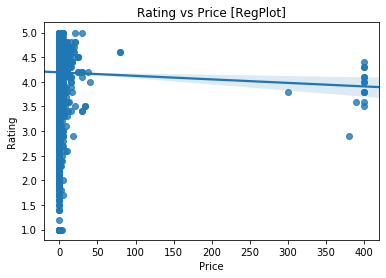

In [120]:
data.Price = data.Price.apply(lambda x: float(x[1:]) if len(x)>1 else float(x))
sns.regplot(x="Price", y="Rating", data=data).set(title = "Rating vs Price [RegPlot]")

In [121]:
data.Genres.unique()

array(['Art & Design', 'Art & Design;Pretend Play',
       'Art & Design;Creativity', 'Auto & Vehicles', 'Beauty',
       'Books & Reference', 'Business', 'Comics', 'Comics;Creativity',
       'Communication', 'Dating', 'Education;Education', 'Education',
       'Education;Creativity', 'Education;Music & Video',
       'Education;Action & Adventure', 'Education;Pretend Play',
       'Education;Brain Games', 'Entertainment',
       'Entertainment;Music & Video', 'Entertainment;Brain Games',
       'Entertainment;Creativity', 'Events', 'Finance', 'Food & Drink',
       'Health & Fitness', 'House & Home', 'Libraries & Demo',
       'Lifestyle', 'Lifestyle;Pretend Play',
       'Adventure;Action & Adventure', 'Arcade', 'Casual', 'Card',
       'Casual;Pretend Play', 'Action', 'Strategy', 'Puzzle', 'Sports',
       'Music', 'Word', 'Racing', 'Casual;Creativity',
       'Casual;Action & Adventure', 'Simulation', 'Adventure', 'Board',
       'Trivia', 'Role Playing', 'Simulation;Education',
 

In [125]:
data.Genres = data.Genres.apply(lambda x: x.split(";")[0])
data.Genres.unique()

array(['Art & Design', 'Auto & Vehicles', 'Beauty', 'Books & Reference',
       'Business', 'Comics', 'Communication', 'Dating', 'Education',
       'Entertainment', 'Events', 'Finance', 'Food & Drink',
       'Health & Fitness', 'House & Home', 'Libraries & Demo',
       'Lifestyle', 'Adventure', 'Arcade', 'Casual', 'Card', 'Action',
       'Strategy', 'Puzzle', 'Sports', 'Music', 'Word', 'Racing',
       'Simulation', 'Board', 'Trivia', 'Role Playing', 'Educational',
       'Music & Audio', 'Video Players & Editors', 'Medical', 'Social',
       'Shopping', 'Photography', 'Travel & Local', 'Tools',
       'Personalization', 'Productivity', 'Parenting', 'Weather',
       'News & Magazines', 'Maps & Navigation', 'Casino'], dtype=object)

In [130]:
gr_mean = data[["Genres", "Rating"]].groupby(by="Genres", as_index=False).mean()
gr_mean.describe()

,Rating
count,48.000000
mean,4.212486
std,0.104071
min,3.970769
25%,4.132114
50%,4.204821
75%,4.286532
max,4.435556


In [134]:
gr_mean = gr_mean.sort_values(by='Rating')
print(gr_mean.iloc[0])
print(gr_mean.iloc[-1])

Genres     Dating
Rating    3.97077
Name: 14, dtype: object
Genres     Events
Rating    4.43556
Name: 18, dtype: object


In [135]:
data['Last Updated'].head()

0     January 7, 2018
1    January 15, 2018
2      August 1, 2018
3        June 8, 2018
4       June 20, 2018
Name: Last Updated, dtype: object

In [141]:
data['Last Updated'] = data['Last Updated'].apply(lambda x: pd.to_datetime(x))

In [142]:
data['Last Updated'].head()

0   2018-01-07
1   2018-01-15
2   2018-08-01
3   2018-06-08
4   2018-06-20
Name: Last Updated, dtype: datetime64[ns]

In [144]:
max_date = data['Last Updated'].max()
max_date

Timestamp('2018-08-08 00:00:00')

In [158]:
data['Last Updated Days'] = (max_date - data['Last Updated']).apply(lambda x: x.days)
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Last Updated Days
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,8,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,213
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,11,Free,0.0,Everyone,Art & Design,2018-01-15,2.0.0,4.0.3 and up,205
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,13,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up,7
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,15,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up,61
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,10,Free,0.0,Everyone,Art & Design,2018-06-20,1.1,4.4 and up,49


[Text(0.5, 1.0, 'Rating vs Last Updated [RegPlot]')]

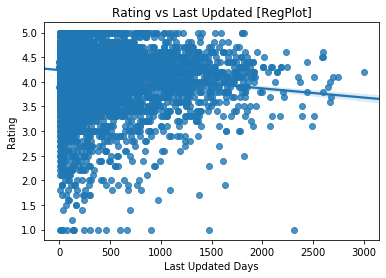

In [159]:
sns.regplot(x="Last Updated Days", y="Rating", data=data).set(title="Rating vs Last Updated [RegPlot]")

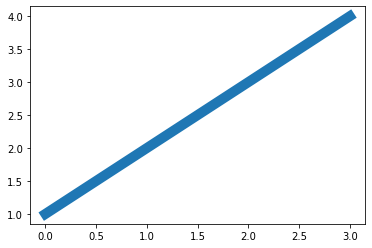

In [166]:
plt.plot([1,2,3,4], lw=10)